# WEB TRAFFIC PROJECT

In [1]:
#import libraries
import pandas as pd
import numpy as np
import sqlite3 as sql

In [2]:
#install ipython-sql library which will enable you to run sql in jupyter 
#!pip install ipython-sql

In [3]:
#connect to a database file
database = 'traffic.db'
connection = sql.connect(database)

In [4]:
query ='''SELECT * FROM events'''

In [5]:
df = pd.read_sql_query(query, connection)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB


In [7]:
#Load the sql module in ipython (called line magic)

%load_ext sql

In [8]:
#To point the sql query to the database we want to use
%sql sqlite:///traffic.db

In [9]:
%%sql

SELECT *
FROM events
LIMIT 5

 * sqlite:///traffic.db
Done.


event,date,country,city,artist,album,track,isrc,linkid
click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


### 1. [SQL + Pandas] How many total pageview events did the links in the provided dataset receive in the full period, how many per day?

> **Total pageview events**

In [22]:
%%sql

select event, count(Distinct linkid) as number_of_links
from events
where event = "pageview"

 * sqlite:///traffic.db
Done.


event,number_of_links
pageview,3837


> **Number of pageview per day**

In [71]:
%%sql

select count(Distinct linkid) as number_of_links
from events

 * sqlite:///traffic.db
Done.


number_of_links
3839


In [26]:
pageview = 3837

number_of_links = 3839


click_per_day = number_of_links / pageview
click_per_day

1.000521240552515

> The total pageviews per events is 3,837 and number of pageviews per day is 1

### Total number of events throughout a seven-day period

In [75]:
%%sql

select count(Distinct linkid), date as number_of_links
from events
group by date

 * sqlite:///traffic.db
Done.


count(Distinct linkid),number_of_links
2859,2021-08-19
1429,2021-08-20
443,2021-08-21
438,2021-08-22
444,2021-08-23
469,2021-08-24
481,2021-08-25


In [85]:
#Filtering out the unique values from linkid by date 
dfdate= df.groupby(['date']).linkid.nunique()
df_date = pd.DataFrame(dfdate)
df_date

,linkid
date,
2021-08-19,2859
2021-08-20,1429
2021-08-21,443
2021-08-22,438
2021-08-23,444
2021-08-24,469
2021-08-25,481


<Figure size 576x504 with 0 Axes>

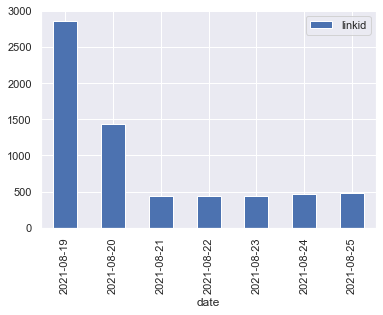

In [86]:
# Distribution of the date by link
plt.figure(figsize = [8,7])
sn.set_theme(style="darkgrid")
df_date.plot(kind='bar');

### 2.	[SQL + Pandas] What about the other recorded events?

In [27]:
%%sql

select event, count(Distinct linkid) as number_of_links
from events
group by event


 * sqlite:///traffic.db
Done.


event,number_of_links
click,2255
pageview,3837
preview,495


In [84]:
#pandas 
df.groupby(['event']).linkid.nunique()


event
click       2255
pageview    3837
preview      495
Name: linkid, dtype: int64

> Findings shows that there are  2,255 Clicks and 495 previews. 


### 3.	[SQL + Pandas] Which countries did the pageviews come from?

#### Using SQL 

In [32]:
%%sql

SELECT country, event, count(event) as Numbers_of_Pageviews_per_countries
FROM events
WHERE event = "pageview"
GROUP BY country 
ORDER BY count(event) DESC


 * sqlite:///traffic.db
Done.


country,event,Numbers_of_Pageviews_per_countries
Saudi Arabia,pageview,28873
India,pageview,27286
United States,pageview,20839
France,pageview,9674
Iraq,pageview,4897
United Kingdom,pageview,3845
Pakistan,pageview,3212
Germany,pageview,3141
Turkey,pageview,2462
United Arab Emirates,pageview,2335


#### Using Pandas

In [33]:
#Filtering out the pageview values from the event column
df_pageview = df[df['event']=='pageview']

#Combining the country, event and linkid column into a new dataframe 
df1 = pd.DataFrame(df_pageview)
coun = df1[['country','event', 'linkid']]
coun

,country,event,linkid
84043,Saudi Arabia,pageview,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
84044,United States,pageview,9c61dba1-9369-4ee4-a215-1d34581cd811
84045,Saudi Arabia,pageview,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
84046,Ireland,pageview,9d847c0e-6824-438f-9dc1-d76fca6dc87c
84047,United Kingdom,pageview,fbf4b935-f961-4b13-b1d8-45ad47093559
...,...,...,...
226273,Kuwait,pageview,04ba6b17-1055-4f0e-a75e-3cdb0d0d4106
226274,India,pageview,2fc15e8b-83aa-40ee-9f9d-5d96c6d4356c
226275,India,pageview,eedc8702-6bd2-499a-972f-260c35f72e0f
226276,France,pageview,e0a76dc3-7ccd-405f-8ee8-a2c55c0e0ed2


### Total Number of country: 211

In [34]:
# Checking the count of pageview per country
coun.country.value_counts()

Saudi Arabia                28873
India                       27286
United States               20839
France                       9674
Iraq                         4897
                            ...  
Lesotho                         1
Principality of Monaco          1
Guernsey                        1
Central African Republic        1
Guinea-Bissau                   1
Name: country, Length: 211, dtype: int64

### Top 10 highest pageviews 

In [35]:
#libraries
import seaborn as sn
import matplotlib.pyplot as plt

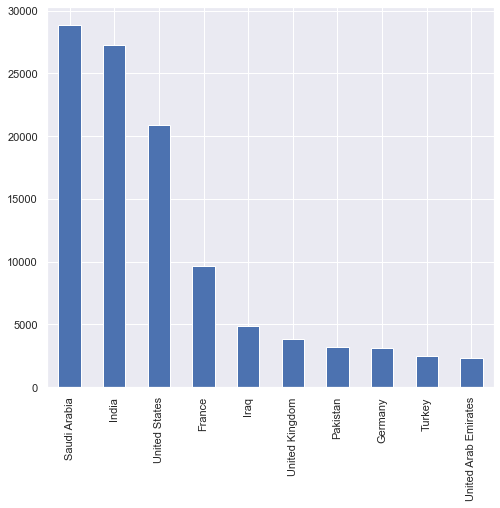

In [36]:
# Distribution of the Top 10 countries
plt.figure(figsize = [8,7])
sn.set_theme(style="darkgrid")
coun['country'].value_counts()[:10].plot(kind='bar');

> The highest pageview rates were in Saudi Arabia, India, and the United States, with 28,873, 27,286 and 20,839 views, respectively. Asia accounted for 62% of pageviews, while North America accounted for 20% and Europe accounted for 18%. Pageviews per user are 10,656.40 on average for all the top 10 countries.


### Top 10 lowest pageviews 

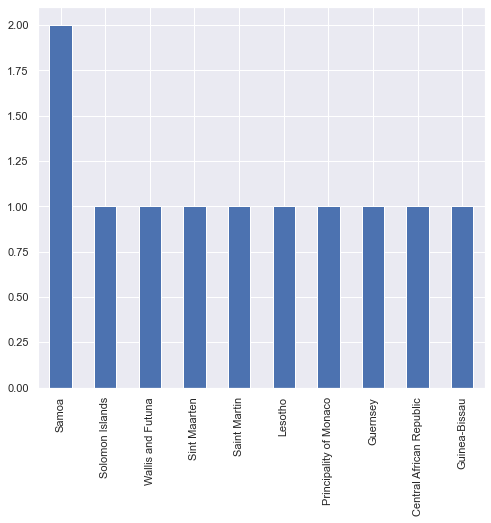

In [37]:
# Distribution of the Top 10 countries
plt.figure(figsize = [8,7])
sn.set_theme(style="darkgrid")
coun['country'].value_counts()[-10:].plot(kind='bar');

> When compared to other countries, African countries have the bulk of the lowest pageviews. The average number of pageviews for the top ten least nations is 1.1

### 4.	[SQL + Pandas] What was the overall click rate (clicks/pageviews)?

In [38]:
%%sql

select event, count(Distinct linkid) as number_of_links
from events
group by event


 * sqlite:///traffic.db
Done.


event,number_of_links
click,2255
pageview,3837
preview,495


In [39]:
click = 2255
pageview = 3837

In [40]:
#click rate
click_rate = (click/pageview) *100
click_rate 

58.76987229606463

> Total click rate 58.77%

### 5.	[Pandas] How does the click rate distribute across different links?

In [43]:

#Filtering out the click values fronm the event column
df_click = df[df['event']=='click']

#Filtering out the pageview values fronm the event column
df_pageview = df[df['event']=='pageview']


# Getting the values of linkid under the pageview
pageview = pd.DataFrame(df_pageview.value_counts('linkid')).values
df1 = pd.DataFrame(pageview)

df_pageview_new = df1.rename(columns={ 0 : 'pageview'})
df_pageview_new

# Getting the values of linkid under the click
click = pd.DataFrame(df_click.value_counts('linkid')).values
df2 = pd.DataFrame(click)
df_click_new = df2.rename(columns={ 0 : 'click'})

 #To concatenate the dataframes
click_rate_df = pd.concat([df_click_new , df_pageview_new], axis=1)
click_rate_df


,click,pageview
0,9692.0,25175
1,2198.0,6600
2,2109.0,5981
3,1500.0,4303
4,1429.0,3532
...,...,...
3832,NaN,1
3833,NaN,1
3834,NaN,1
3835,NaN,1


In [44]:
# Click rate per link
click_rate_df['click_rate_per_link'] = click_rate_df['click']/click_rate_df['pageview']
click_rate_df

,click,pageview,click_rate_per_link
0,9692.0,25175,0.384985
1,2198.0,6600,0.333030
2,2109.0,5981,0.352617
3,1500.0,4303,0.348594
4,1429.0,3532,0.404587
...,...,...,...
3832,NaN,1,NaN
3833,NaN,1,NaN
3834,NaN,1,NaN
3835,NaN,1,NaN


In [45]:
xx = click_rate_df.click[:296]
yy = click_rate_df.click_rate_per_link[:296]

In [46]:
 #To concatenate the dataframes
click_rate_dfrr = pd.concat([xx , yy], axis=1)
click_rate_dfrr

,click,click_rate_per_link
0,9692.0,0.384985
1,2198.0,0.333030
2,2109.0,0.352617
3,1500.0,0.348594
4,1429.0,0.404587
...,...,...
291,11.0,0.423077
292,11.0,0.423077
293,11.0,0.423077
294,11.0,0.440000


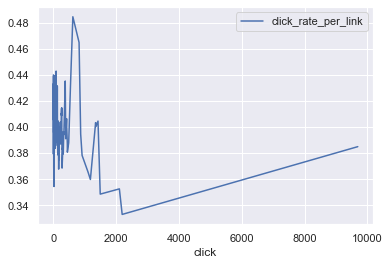

In [47]:
click_rate_dfrr.plot(x = "click", y = "click_rate_per_link"); 

> The average click rate per link is 1, It can be seen from the graph that majority of the click rate per link, is around 1 -1,500 clicks

### 6.	[Pandas & SciPy] Is there any correlation between clicks and previews on a link? Is it significant? How large is the effect? Make sure to at least test for potential linear as well as categorical (think binary) relationships between both variables.

### Filtering out clicks and previews on a link using Pandas

In [48]:
#Filtering out the click values fronm the event column
df_click = df[df['event']=='click']
#df_click 

In [49]:
#Filtering out the preview values fronm the event column
df_preview = df[df['event']=='preview']
#df_preview

In [54]:
# Getting the values of linkid under the preview
preview = pd.DataFrame(df_preview.value_counts('linkid')).values
df1 = pd.DataFrame(preview)

df_preview_new = df1.rename(columns={ 0 : 'preview'})
df_preview_new 

,preview
0,5974
1,1605
2,1571
3,1001
4,849
...,...
490,1
491,1
492,1
493,1


In [55]:
# Getting the values of linkid under the click
click = pd.DataFrame(df_click.value_counts('linkid')).values
df2 = pd.DataFrame(click)
df_click_new = df2.rename(columns={ 0 : 'click'})
df_click_new 

,click
0,9692
1,2198
2,2109
3,1500
4,1429
...,...
2250,1
2251,1
2252,1
2253,1


In [56]:
#To concatenate the dataframes
cp_df = pd.concat([df_click_new , df_preview_new], axis=1)
cp_df

,click,preview
0,9692,5974.0
1,2198,1605.0
2,2109,1571.0
3,1500,1001.0
4,1429,849.0
...,...,...
2250,1,NaN
2251,1,NaN
2252,1,NaN
2253,1,NaN


In [57]:
#filling NaN with zero values in the preview column
cp_df['preview'] = cp_df['preview'].fillna(0)
cp_df

,click,preview
0,9692,5974.0
1,2198,1605.0
2,2109,1571.0
3,1500,1001.0
4,1429,849.0
...,...,...
2250,1,0.0
2251,1,0.0
2252,1,0.0
2253,1,0.0


### Correlation Matrix using Pandas

In [58]:
#Correlation Matrix
corrMatrix =cp_df.corr()
corrMatrix

,click,preview
click,1.000000,0.996568
preview,0.996568,1.000000


### Correlation Matrix using seaborn and matplotlib for visulization

In [59]:
#libraries
import seaborn as sn
import matplotlib.pyplot as plt

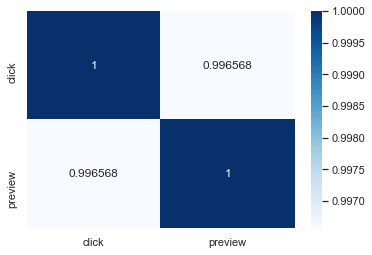

In [60]:
sn.heatmap(corrMatrix, annot=True, cmap='Blues', fmt='g')
plt.show()

> There is a perfect and strong relationship between click and previews on a link


### Using Scipy for the correlation

In [61]:
#importing scipy library
import scipy
from scipy import stats

%matplotlib inline

#Declaring X and Y variables
y =cp_df['click']
x =cp_df['preview']

In [62]:
scipy.stats.pearsonr(x, y)    # Pearson's r

(0.9965680268594976, 0.0)

In [63]:
scipy.stats.spearmanr(x, y)   # Spearman's rho

SpearmanrResult(correlation=0.8376853593153806, pvalue=0.0)

In [64]:
scipy.stats.kendalltau(x, y)  # Kendall's tau

KendalltauResult(correlation=0.8137365378241419, pvalue=0.0)

In [65]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y) #linear Regression 

In [66]:
print ("r-squared:", r_value**2 *100)
print ("Corrolation:", r_value*100)
print ("intercept:", intercept)
print ("slope:", slope)
print ("std_err:", std_err)
print ("p_value:", p_value)

r-squared: 99.31478321586333
Corrolation: 99.65680268594981
intercept: 4.290876697377847
slope: 1.614246715762257
std_err: 0.002824856313530852
p_value: 0.0


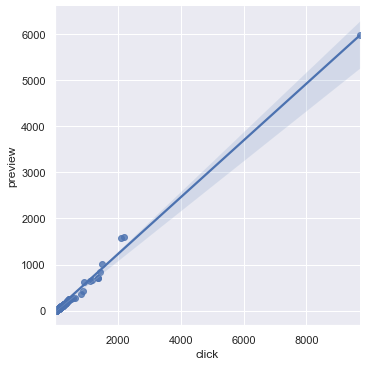

In [67]:
sn.lmplot(x="click", y="preview", data=cp_df);

> **Y = 1.614 + 4.291X** 
      


> **Preview = 1.614 + 4.291 Click**

> There is a positive effect of preview on click. The tendency that a page will be previewed is 161.4%


### Recommendation

> 1. African nations have a large population, hence, more blog posts should be addressed to them in order to enhance click rates.

> 2. The European nations should be given special consideration even though  they accounted for 18% of all pageviews.

> 3. There is a strong correlation between previews and clicks; more appealing material should be provided to increase click rate.
